In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])

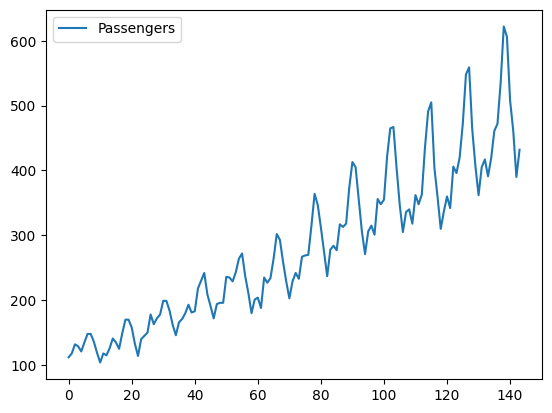

In [61]:
data.plot()
plt.show()

[1,2,3,4,5,6,7,8,9,10]

time step = 3

* 1,2,3>4
* 2,3,4>5
* 3,4,5>6
* 4,5,6>7
* 5,6,7>8
* 6,7,8>9
* 7,8,9>10

In [62]:
def prepare_data(seq, time_step):
    x,y= [], []
    for i in range(len(seq) - time_step):
        x.append(seq[i:i+time_step])
        y.append(seq[i+time_step])
    return np.array(x), np.array(y)

In [63]:
time_step = 40
x,y = prepare_data(data.values, time_step)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [65]:
x.reshape(x.shape[0],x.shape[1],1)

array([[[112],
        [118],
        [132],
        ...,
        [180],
        [193],
        [181]],

       [[118],
        [132],
        [129],
        ...,
        [193],
        [181],
        [183]],

       [[132],
        [129],
        [121],
        ...,
        [181],
        [183],
        [218]],

       ...,

       [[422],
        [465],
        [467],
        ...,
        [622],
        [606],
        [508]],

       [[465],
        [467],
        [404],
        ...,
        [606],
        [508],
        [461]],

       [[467],
        [404],
        [347],
        ...,
        [508],
        [461],
        [390]]], dtype=int64)

In [66]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape = (time_step,1)))
model.add(Dense(1))

In [67]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [68]:
history = model.fit(x,y,epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 64ms/step - loss: 119890.4844 - val_loss: 253561.6719
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 100654.6406 - val_loss: 218399.4062
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 90473.8281 - val_loss: 188053.9688
Epoch 4/100
6/6 [==============================] - 0s 21ms/step - loss: 81405.2734 - val_loss: 179174.9531
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 91204.5938 - val_loss: 158776.6719
Epoch 6/100
6/6 [==============================] - 0s 21ms/step - loss: 60317.5781 - val_loss: 68726.1875
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 22822.9238 - val_loss: 34012.0312
Epoch 8/100
6/6 [==============================] - 0s 20ms/step - loss: 18457.4766 - val_loss: 42272.9609
Epoch 9/100
6/6 [==============================] - 0s 20ms/step - loss: 17166.6426 - val_loss: 20978.7852
Epoch 10/100
6/6 [=====================

In [69]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print(f'{loss =}, {val_loss =}')

loss =[119890.484375, 100654.640625, 90473.828125, 81405.2734375, 91204.59375, 60317.578125, 22822.923828125, 18457.4765625, 17166.642578125, 215668.625, 366158.15625, 36332.9921875, 29285.265625, 22057.712890625, 22071.013671875, 46903.76171875, 64901.58984375, 76442.5546875, 79670.3046875, 80468.6015625, 80781.6484375, 80853.3203125, 80814.4609375, 80717.671875, 80569.5625, 80416.0078125, 80220.96875, 80010.703125, 79771.8359375, 79503.328125, 79186.6875, 78836.671875, 78386.015625, 77889.5625, 77222.1796875, 76420.34375, 75315.2265625, 73751.21875, 71879.4765625, 69363.6953125, 66831.03125, 64344.98828125, 61818.4453125, 59736.953125, 57572.7421875, 55609.2890625, 53775.95703125, 52110.625, 50510.765625, 49016.4921875, 47700.67578125, 46468.2265625, 45320.71875, 44204.21875, 43170.96875, 42167.546875, 41180.99609375, 40227.5, 39286.22265625, 38330.95703125, 37385.734375, 36439.17578125, 35487.57421875, 34583.02734375, 33659.0234375, 32718.1171875, 31827.072265625, 31014.095703125, 3

In [70]:
model.evaluate(x,y)

1/4 [======>.......................] - ETA: 0s - loss: 15662.3984

4/4 [==============================] - 0s 7ms/step - loss: 15806.6885


15806.6884765625

In [71]:
test_seq = data.values[-time_step:].flatten()
prediction = []

for _ in range(100):
    pred = model.predict(test_seq.reshape(1,time_step,1))[0,0]
    prediction.append(pred)
    test_seq = np.append(test_seq[1:],pred)

1/1 [==============================] - 0s 16ms/step


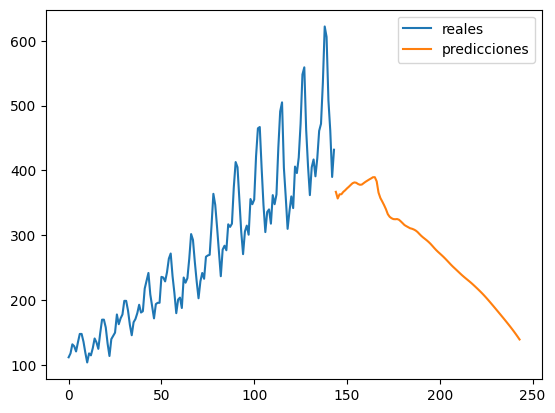

In [72]:
plt.plot(range(len(data.values)),data.values, label = 'reales')
plt.plot(range(len(data.values),len(data.values)+100), prediction, label = 'predicciones')
plt.legend()
plt.show()